<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/USLOUISIANACANCERBEGININGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np

pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [28]:
cancer_df = pd.read_csv('QM2CancerRates.csv', header=None)
cancer_df.columns = cancer_df.iloc[8].values
cancer_df = cancer_df[11:]
cancer_df = cancer_df.reset_index(drop=True)
cancer_df['Parish'] = cancer_df['Parish'].str.replace('(7)', '', regex=False)
index = cancer_df[cancer_df['Parish'] == 'Lincoln Parish'].index[0]
cancer_df = cancer_df.iloc[:index + 1]
cancer_df.head()

,Parish,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,Claiborne Parish,22027,Rural,315.8,275.6,360.7,1,1,39,50,rising,3.1,0.7,8.6
1,Iberville Parish,22047,Urban,314.8,287.3,344.3,2,1,21,106,rising,1.5,0.5,2.5
2,Cameron Parish,22023,Urban,307.9,245,382.9,3,1,64,19,stable,0.7,-1.8,2.9
3,St. Landry Parish,22097,Rural,298.6,281.4,316.7,4,1,23,249,rising,1.5,0.7,2.2
4,Red River Parish,22081,Rural,291.4,240.6,350.7,5,1,63,26,stable,1.6,-0.4,3.6


In [29]:
target_parishes = ['East Baton Rouge Parish', 'West Baton Rouge Parish', 'Iberville Parish', 'Ascension Parish', 'St. James Parish', 'St. John the Baptist Parish', 'St. Charles Parish', 'Jefferson Parish']
target_parishes_df = cancer_df[cancer_df['Parish'].isin(target_parishes)]
other_parishes_df = cancer_df[~cancer_df['Parish'].isin(target_parishes)]


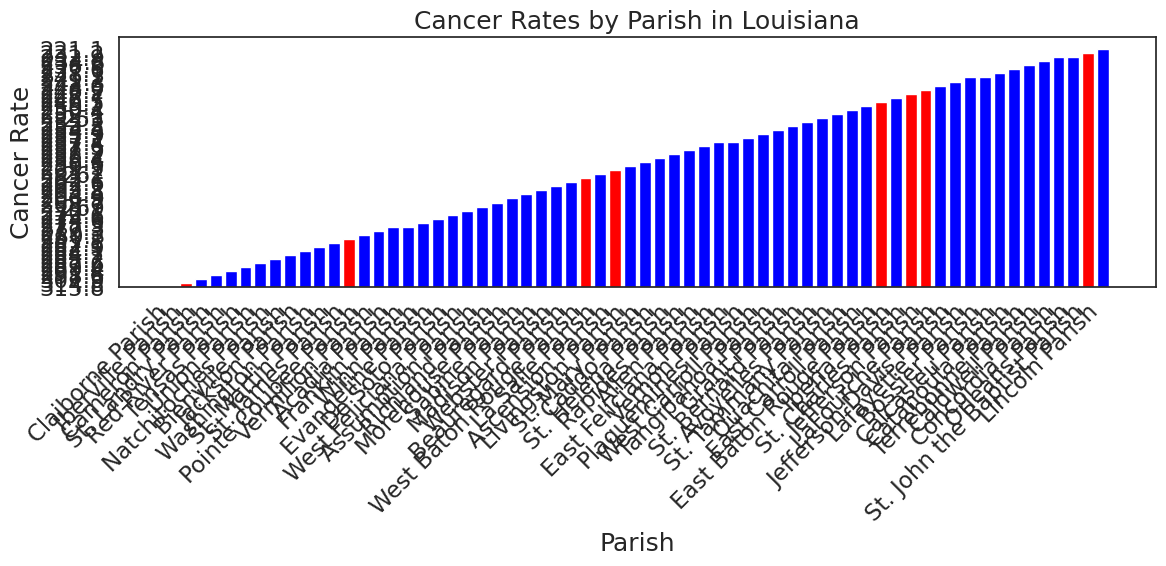

In [30]:
import matplotlib.pyplot as plt

target_parishes = ['East Baton Rouge Parish', 'West Baton Rouge Parish', 'Iberville Parish', 'Ascension Parish', 'St. James Parish', 'St. John the Baptist Parish', 'St. Charles Parish', 'Jefferson Parish']

colors = ['red' if parish in target_parishes else 'blue' for parish in cancer_df['Parish']]

plt.figure(figsize=(12, 6))
plt.bar(cancer_df['Parish'], cancer_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'], color=colors)
plt.xlabel('Parish')
plt.ylabel('Cancer Rate')
plt.title('Cancer Rates by Parish in Louisiana')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
print(len(cancer_df))

64


In [34]:
target_parishes_rates = target_parishes_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].astype(float)
other_parishes_rates = other_parishes_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].astype(float)

In [38]:
def manual_ttest(group1, group2, plot=False): # define a function called "manual_ttest" that takes two groups and a boolean value for whether or not to plot the results as arguments

    desc1, desc2=group1.describe(), group2.describe() # get descriptive statistics for both samples

    n1,std1,mean1 = desc1['count'], desc1['std'] ,desc1['mean'] # get the sample size, standard deviation, and mean of the first sample
    n2,std2,mean2 = desc2['count'], desc2['std'] ,desc2['mean'] # get the sample size, standard deviation, and mean of the second sample

    # calculate standard errors
    se1, se2 = std1**2/n1, std2**2/n2 # '**2' is the same as squaring the number

    # standard error on the difference between the samples
    sed = np.sqrt(se1 + se2)

    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed

    # print the results
    print("Group 1: n=%.0f, mean=%.3f, std=%.3f" % (n1,mean1,std1))
    print("Group 2: n=%.0f, mean=%.3f, std=%.3f" % (n2,mean2,std2))
    print('The t-statistic is %.3f' % t_stat) # print the t-statistic

    if plot==True: # if the plot argument is set to True, plot the results
        groups=pd.DataFrame() # create an empty dataframe
        i=1 # create a counter variable called "i" and set it equal to 1

        # Use pd.concat instead of append
        # Create a list to store the dataframes
        dfs = []
        for group in [group1, group2]: # loop through each group in the list of groups
            plot_df=pd.DataFrame({'Values': group,'Group':i}) # create a dataframe with the values of the group and a column called "Group" that contains the group number
            dfs.append(plot_df) # append the dataframe to the list
            i+=1 # increase the counter by 1

        groups = pd.concat(dfs, ignore_index=True) # Concatenate the dataframes

        sns.pointplot(data=groups , x='Group', y='Values',errorbar=('ci', 95), color='black', join=False, capsize=.8) # plot the means of the groups with a 95% confidence interval
        plt.title('Comparison of Group Means with 95% Confidence Intervals')

        x = np.linspace(-3, 3, 100)  # Range for x-axis
        plt.plot(x, norm.pdf(x), color='blue', label='Standard Normal Distribution')  # Plot the normal curve

        # Plot the t-statistic on the z-distribution
        plt.axvline(x=t_stat, color='red', linestyle='--', label='t-statistic')

        plt.legend()  # Show legend
        plt.show()


    return t_stat

Group 1: n=8, mean=261.712, std=25.945
Group 2: n=56, mean=263.137, std=19.627
The t-statistic is -0.149


<ipython-input-38-2d3fa266ea38>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=groups , x='Group', y='Values',errorbar=('ci', 95), color='black', join=False, capsize=.8) # plot the means of the groups with a 95% confidence interval


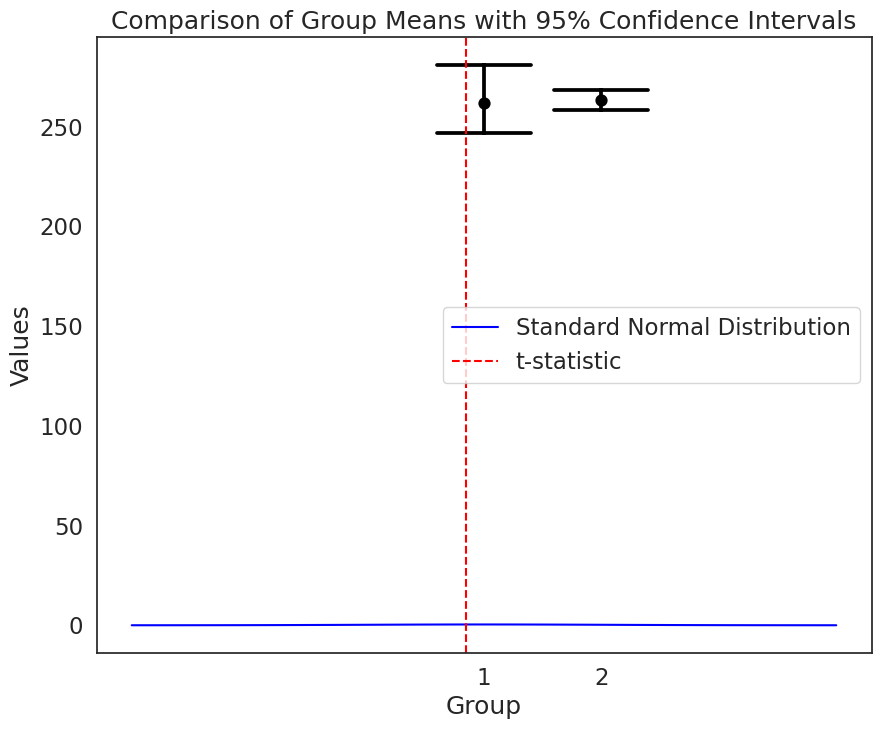

The t-statistic is -0.149


In [39]:
t_statistic = manual_ttest(target_parishes_rates, other_parishes_rates, plot=True)
print('The t-statistic is %.3f' % t_statistic)

In [41]:
def plot_z(test_statistic):
    mu, se= 0, 1 # create two variables, a mean "mu" equal to zero, and standard deviation "se" equal to 1
    x = np.linspace(mu - 3*se, mu + 3*se, 100) # create a range of values from -3 to 3 standard deviations

    plt.plot(x, norm.pdf(x, mu, se)) # plot the normal distribution
    plt.axvline(mu-se*1.96, color='blue', linestyle='dashed', linewidth=1.5,label='µ ± 1.96σ (95% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*1.96, color='blue', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations
    plt.axvline(mu-se*2.58, color='green', linestyle='dashed', linewidth=1.5,label='µ ± 2.58σ (99% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*2.58, color='green', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations

    plt.axvline(test_statistic, color='red', linestyle='solid', linewidth=1.5,label='Test Statistic') # plot a vertical line at the test statistic


    plt.ylim(0,0.4)
    plt.legend()
    plt.title('Z Distribution') # add a title
    plt.show()

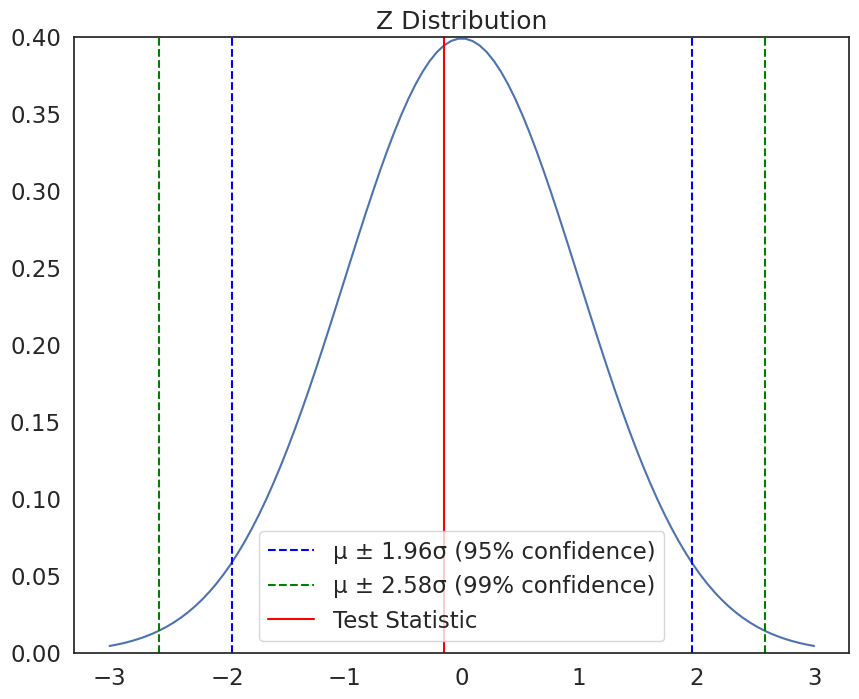

In [42]:
plot_z(t_statistic)

In [43]:
from scipy import stats

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(
    target_parishes_rates, other_parishes_rates
)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.18446844555133132
P-value: 0.8542480376380777


In [53]:
uscancer_df = pd.read_csv('QM2USCancer.csv', header=None)
uscancer_df.columns = uscancer_df.iloc[8].values
uscancer_df = uscancer_df[10:]
uscancer_df = uscancer_df.reset_index(drop=True)
yakutat_index = uscancer_df[uscancer_df['County'] == 'Yakutat City and Borough, Alaska(6)'].index[0]
uscancer_df = uscancer_df.iloc[:yakutat_index + 1]
uscancer_df['County'] = uscancer_df['County'].str.replace(r'\(6\)', '', regex=True)
uscancer_df['County'] = uscancer_df['County'].str.replace(r'\(7\)', '', regex=True)
uscancer_df.head()



,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,"Union County, Florida",12125,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
1,"Traverse County, Minnesota",27155,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
2,"Polk County, Texas",48373,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
3,"Galax City, Virginia",51640,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4.0
4,"Greeley County, Nebraska",31077,Rural,653.1,519.4,812.5,N/A,N/A,N/A,21,stable,0.7,-2.3,3.6


In [54]:
louisiana_df = uscancer_df[uscancer_df['County'].str.endswith(', Louisiana')]
louisiana_df.head()

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
25,"Iberville Parish, Louisiana",22047,Urban,586.4,551.9,622.7,N/A,N/A,N/A,228,stable,-0.6,-4.8,0.5
33,"Cameron Parish, Louisiana",22023,Urban,579.7,501.3,667.6,N/A,N/A,N/A,43,stable,0.6,-0.7,1.7
125,"St. Landry Parish, Louisiana",22097,Rural,542.3,521.3,563.9,N/A,N/A,N/A,543,rising,0.6,0.1,1.1
154,"Vermilion Parish, Louisiana",22113,Urban,537,512.2,562.7,N/A,N/A,N/A,373,stable,0.3,-0.4,1.0
181,"St. James Parish, Louisiana",22093,Urban,533.5,493.6,576,N/A,N/A,N/A,144,rising,0.9,0.2,1.7


In [55]:
# Extract Louisiana counties
louisiana_df = uscancer_df[uscancer_df['County'].str.endswith(', Louisiana')]

# Remove Louisiana counties from uscancer_df
uscancer_df = uscancer_df[~uscancer_df['County'].str.endswith(', Louisiana')]

# Display the updated uscancer_df (optional)
uscancer_df.head()

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,"Union County, Florida",12125,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
1,"Traverse County, Minnesota",27155,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
2,"Polk County, Texas",48373,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
3,"Galax City, Virginia",51640,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4.0
4,"Greeley County, Nebraska",31077,Rural,653.1,519.4,812.5,N/A,N/A,N/A,21,stable,0.7,-2.3,3.6


In [59]:
# Extract Louisiana rates
louisiana_rates = louisiana_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].astype(float)

# Extract rates for other counties, replacing 'data not available ' and '* ' with NaN and then converting to float
other_counties_rates = uscancer_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'] \
    .replace(['data not available ', r'\* '], np.nan, regex=True).astype(float) # Escaped '*' using raw string r'\* '

# Perform t-test
from scipy import stats
t_statistic, p_value = stats.ttest_ind(louisiana_rates, other_counties_rates, nan_policy='omit')

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.521014487395283
P-value: 3.6651366311638925e-08


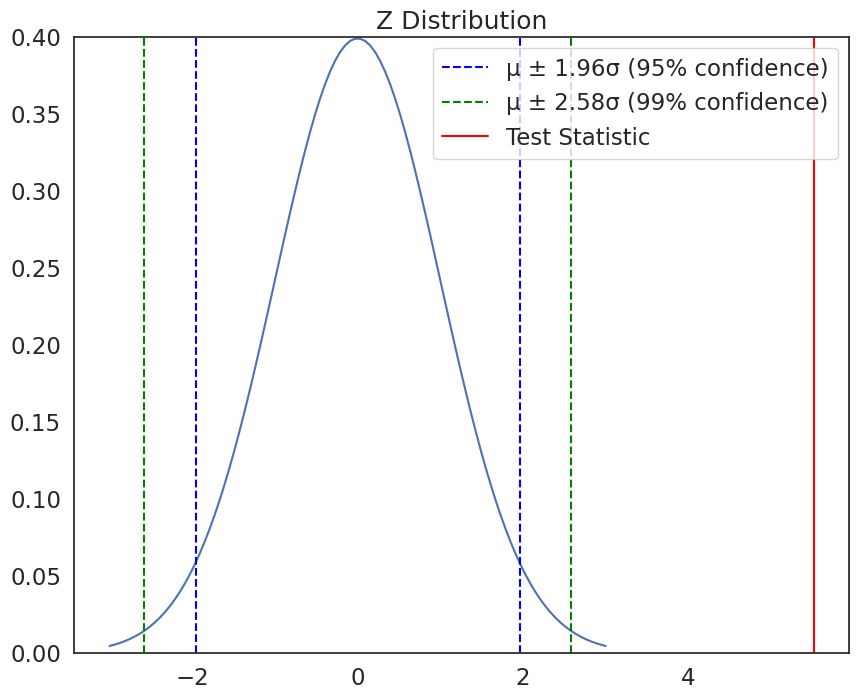

In [60]:
plot_z(5.521014487395283)